<a href="https://colab.research.google.com/github/anew0m/AStudy_Pandas-basic/blob/main/study/10_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_Windows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10_시계열 데이터 분석 Windows

## 16) 시계열 데이터(Time Series Data) 분석을 위한 판다스 Expanding and Rolling 이해하기

Pandas Expanding and Rolling
* https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html

### Rolling

In [5]:
import pandas as pd
import numpy as np
% matplotlib inline

In [4]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2015', periods=1000))
s

2015-01-01   -1.765039
2015-01-02   -0.642682
2015-01-03   -0.471186
2015-01-04    2.217181
2015-01-05   -2.412308
                ...   
2017-09-22    0.568851
2017-09-23    0.480622
2017-09-24   -0.854882
2017-09-25   -0.093188
2017-09-26    0.746529
Freq: D, Length: 1000, dtype: float64

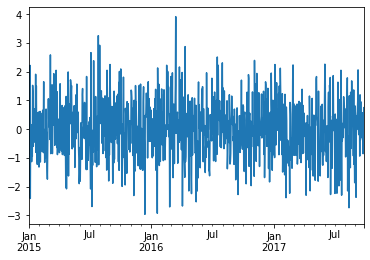

In [6]:
s.plot()

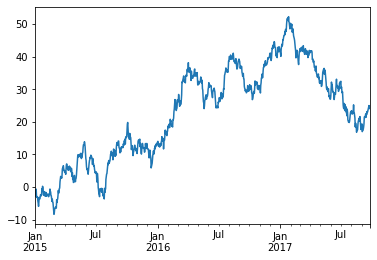

In [7]:
s = s.cumsum()
s.plot()

In [8]:
r = s.rolling(window=60)
r

Rolling [window=60,center=False,axis=0]

In [12]:
r?

In [13]:
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22    20.823599
2017-09-23    20.905507
2017-09-24    20.978089
2017-09-25    21.042653
2017-09-26    21.100908
Freq: D, Length: 1000, dtype: float64

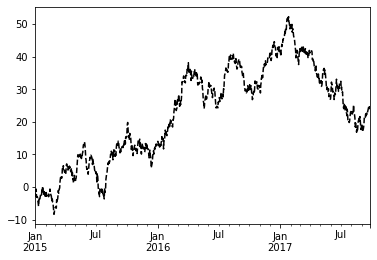

In [14]:
s.plot(style = 'k--')

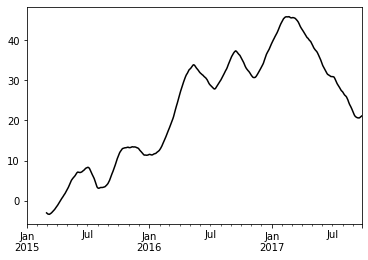

In [15]:
r.mean().plot(style = 'k')

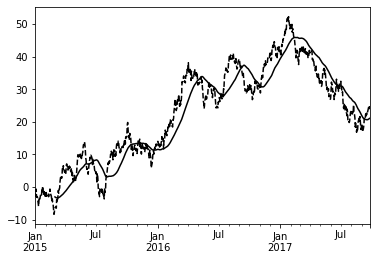

In [16]:
s.plot(style = 'k--')
r.mean().plot(style = 'k')

In [17]:
r = s.rolling(window=60)

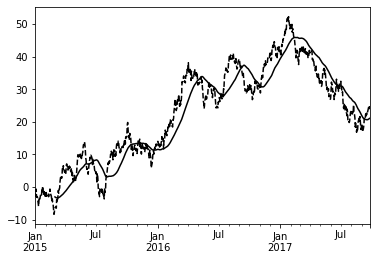

In [18]:
s.plot(style = 'k--')
r.mean().plot(style = 'k')

* rolling 은 이동평균을 구할 때

In [22]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2015', periods=1000),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2015-01-01,-2.198029,0.552036,0.539996,-1.815504
2015-01-02,-1.202314,-0.716713,1.442017,-1.375038
2015-01-03,0.075160,-0.195674,-0.136113,-1.059726
2015-01-04,2.050935,-1.997668,0.203228,-1.457775
2015-01-05,0.569529,2.299786,0.191964,0.031104
...,...,...,...,...
2017-09-22,-1.879503,2.139173,-0.658546,-1.376377
2017-09-23,1.289978,0.320086,2.050551,0.094373
2017-09-24,-0.683964,0.353451,-1.143861,-0.363798
2017-09-25,0.103917,-0.848895,0.033565,0.150747


In [24]:
df = df.cumsum()
df

,A,B,C,D
2015-01-01,-2.198029,0.552036,0.539996,-1.815504
2015-01-02,-5.598372,0.387359,2.522009,-5.006046
2015-01-03,-8.923555,0.027008,4.367908,-9.256313
2015-01-04,-10.197803,-2.331012,6.417035,-14.964356
2015-01-05,-10.902522,-2.389245,8.658126,-20.641294
...,...,...,...,...
2017-09-22,1305.913615,-12484.105887,5173.080929,-6259.795859
2017-09-23,1321.184418,-12509.441404,5171.455438,-6267.746523
2017-09-24,1335.771257,-12534.423469,5168.686086,-6276.060985
2017-09-25,1350.462013,-12560.254429,5165.950299,-6284.224700


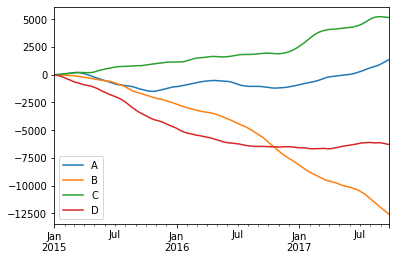

In [25]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2efd3066d8>,
      dtype=object)

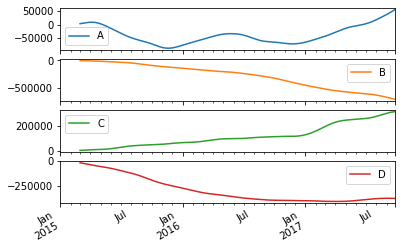

In [27]:
df.rolling(window=60).sum().plot(subplots=True)

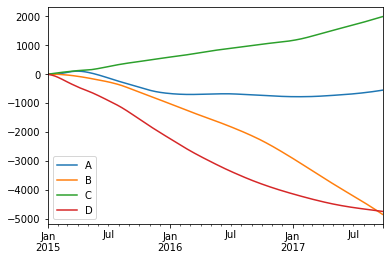

In [28]:
df.rolling(window=len(df), min_periods = 1).mean().plot()

### Expanding

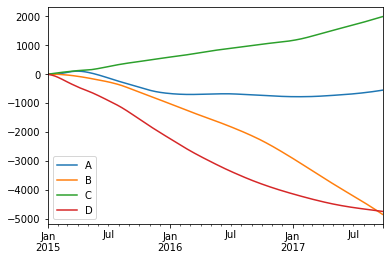

In [29]:
df.expanding(min_periods = 1).mean().plot()

In [30]:
df.expanding?

In [33]:
dfe = pd.DataFrame({"B": [0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


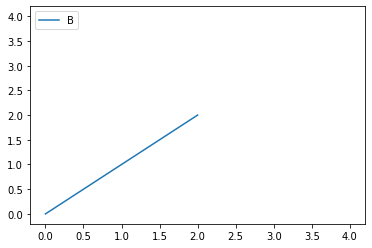

In [34]:
dfe.plot()

In [35]:
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


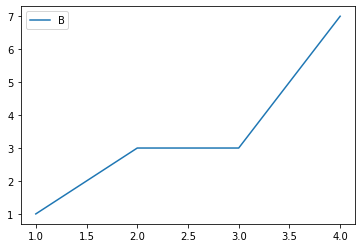

In [36]:
dfe.expanding(2).sum().plot()

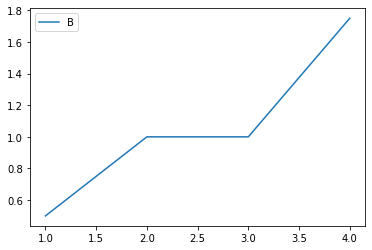

In [37]:
dfe.expanding(2).mean().plot()

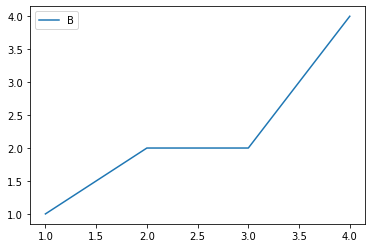

In [38]:
dfe.expanding(2).max().plot()